In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats        
import csv 
import os
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)
np.random.seed(5190)

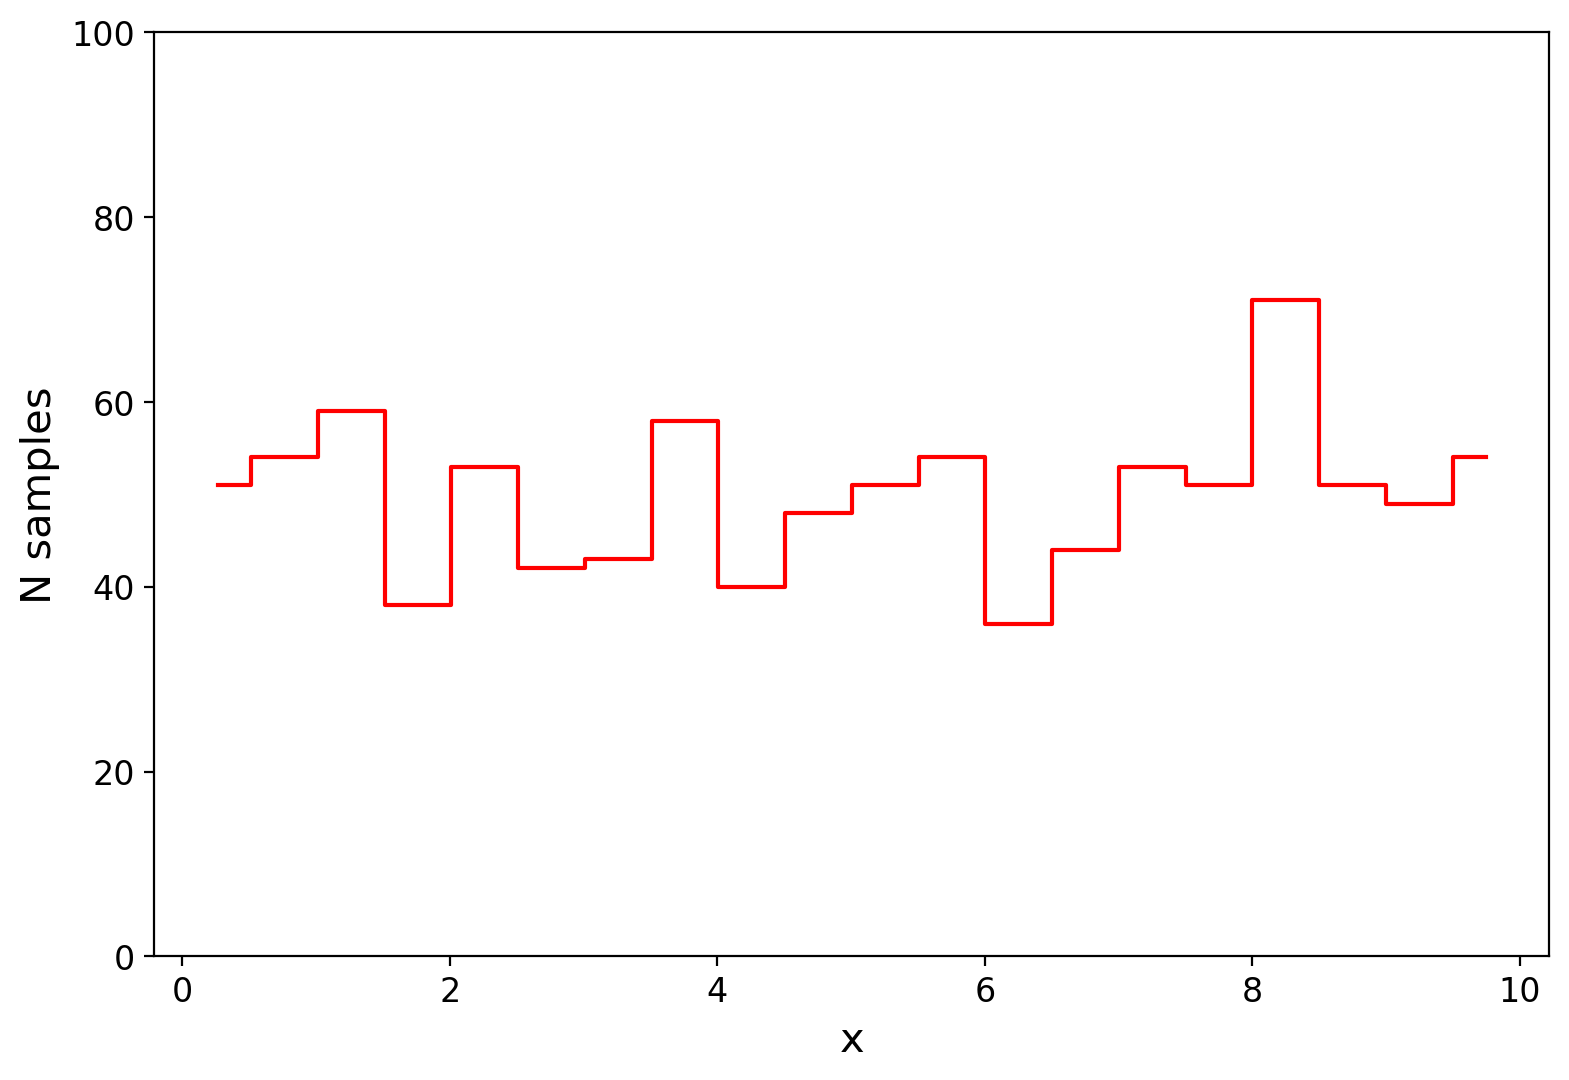

In [16]:
bkg = np.random.uniform(0,10, 1000) 
histy, bin_edges = np.histogram(bkg, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

                            
#plotting-------------------
#plot size
#fig, ax = plt.subplots(figsize=(9,6)) #optionally set the figure size here

#plot data and axes limits
plt.plot(bin_centers,histy,drawstyle = 'steps-mid',color="r")
plt.ylim(0,100) #You will need to change this for a normal distribution
#ax.set_ylim([0,100]) #set the y-range of ax to be 0 to 100, if using ax

#plot labels and style
plt.xlabel('x', fontsize=15) #Label x
plt.ylabel('N samples', fontsize=15) #Label y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("lec1pic1.pdf", dpi=400)
plt.show()

## Integral of histogram
What is the integral of the histogram in the previous example, a uniform distribution sampled 1000 times? You can add to the code below to calculate your answer, or you may determine the result without computation.

Enter a number for your answer.

In [17]:
bkg = np.random.uniform(0,10, 1000) 
histy, bin_edges = np.histogram(bkg, bins=20)

integral = len(bkg) #complete the code

print("Integral:",integral)

Integral: 1000


How result depends on number of binsize?

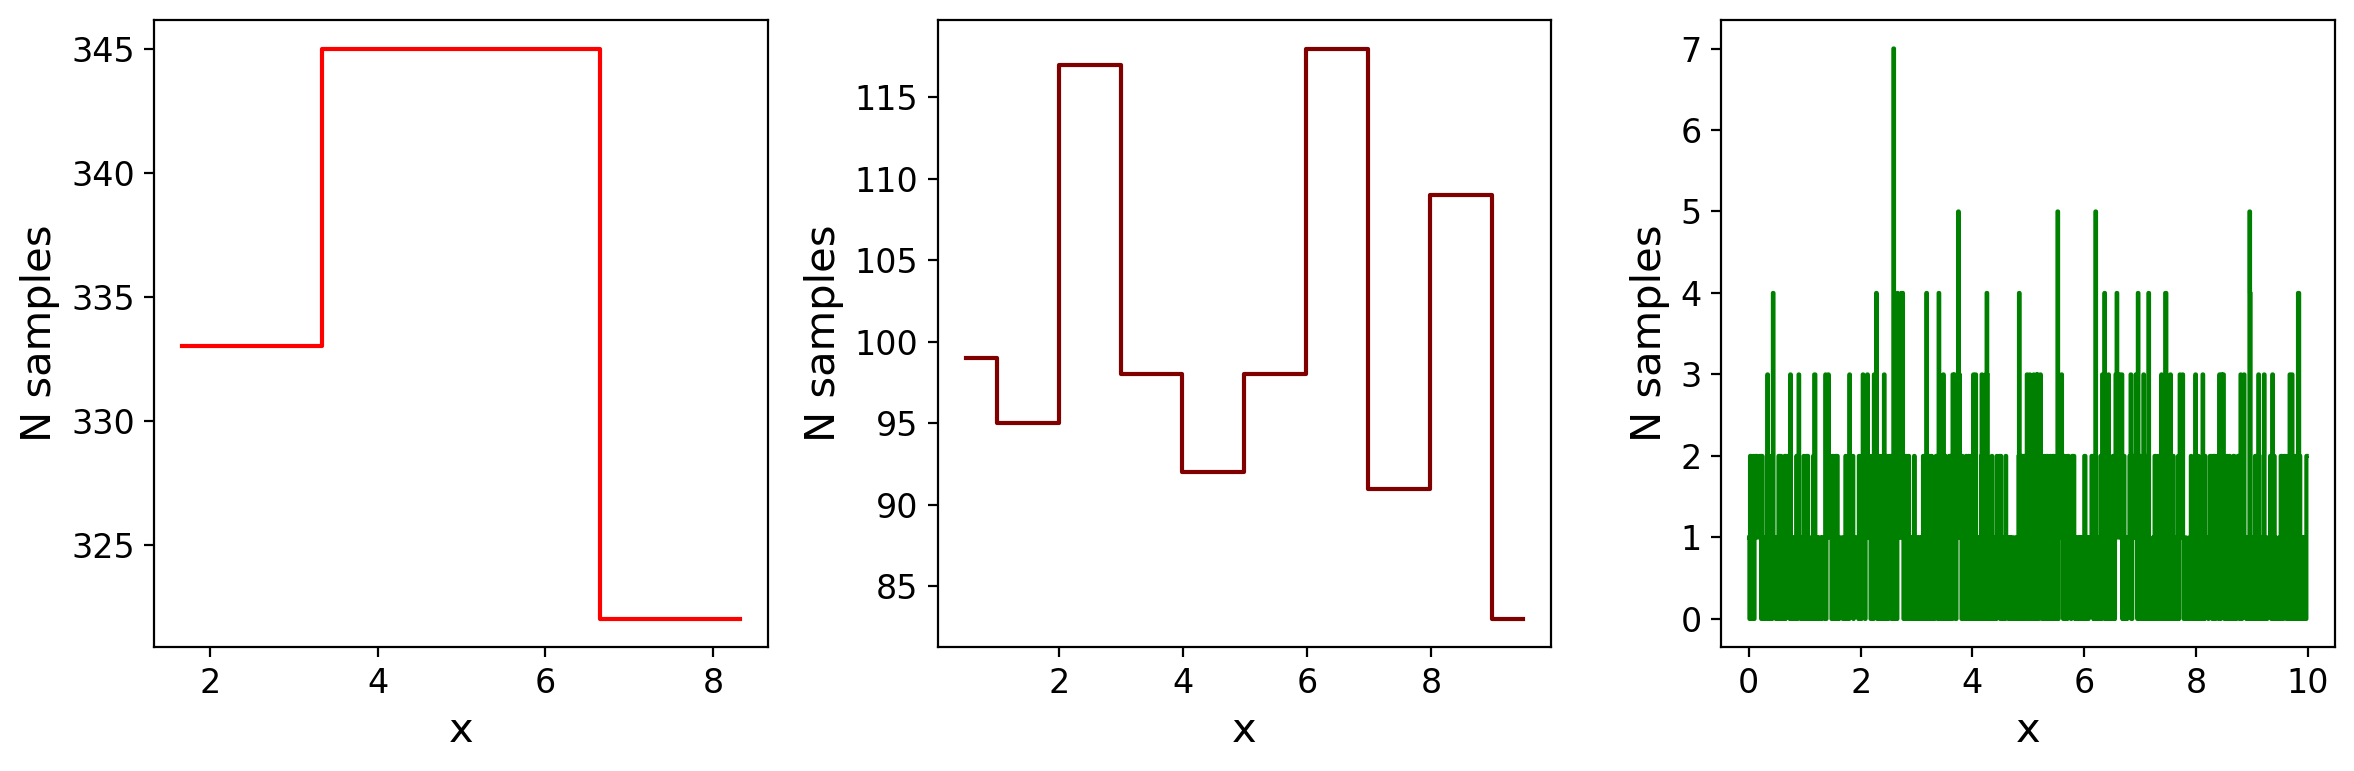

In [22]:
# Generate random samples
samples = np.random.uniform(0, 10, 1000)

# Create figure and subplots
plt.figure(figsize=(12, 4))
bins = [3, 10, 1000]

# Create subplots
ax1 = plt.gcf().add_subplot(131)
ax2 = plt.gcf().add_subplot(132)
ax3 = plt.gcf().add_subplot(133)

# Compute histograms
histy1, bin_edges1 = np.histogram(samples, bins=bins[0])
bin_centers1 = 0.5 * (bin_edges1[1:] + bin_edges1[:-1])

histy2, bin_edges2 = np.histogram(samples, bins=bins[1])
bin_centers2 = 0.5 * (bin_edges2[1:] + bin_edges2[:-1])

histy3, bin_edges3 = np.histogram(samples, bins=bins[2])
bin_centers3 = 0.5 * (bin_edges3[1:] + bin_edges3[:-1])

# Plot data
ax1.plot(bin_centers1, histy1, drawstyle='steps-mid', color='red')
ax2.plot(bin_centers2, histy2, drawstyle='steps-mid', color='maroon')
ax3.plot(bin_centers3, histy3, drawstyle='steps-mid', color='green')

# Set labels and style for each subplot
ax1.set_xlabel('x', fontsize=15)
ax1.set_ylabel('N samples', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.set_xlabel('x', fontsize=15)
ax2.set_ylabel('N samples', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax3.set_xlabel('x', fontsize=15)
ax3.set_ylabel('N samples', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.savefig("lec1pic2.pdf",dpi=400)
plt.show()


<h3>Overview</h3>

Let's try something a bit more complicated. In the following code, we are going to sample TWO random variables described by uniform (flat) distributions. Then, we'll define a new random variable that's the SUM of the two sampled values. The "observed" value of a random number (i.e., what you get when you sample a distribution) is also called a "realization".

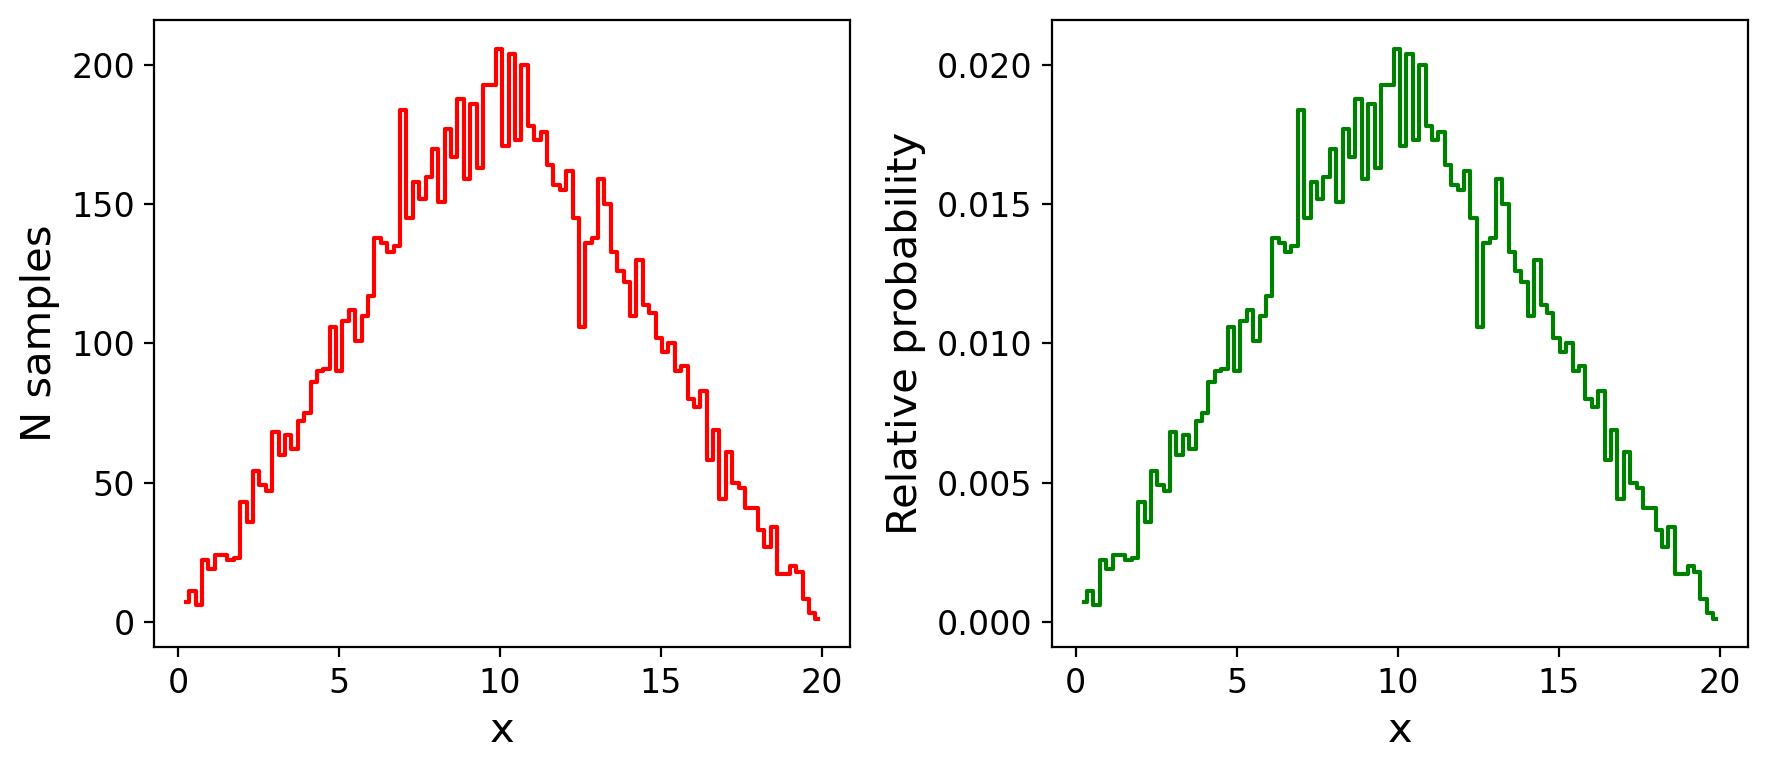

In [36]:
plt.figure(figsize=(9, 4))
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.uniform(0,10, 10000) #this outputs an array of 10,000
bkg3 = np.random.normal(0,10, 10000)
bkg4 = np.random.normal(0,10, 10000)
#Now we sum them
data1 = bkg1 + bkg2 #since bkg1 and 2 are numpy arrays, doing this adds element-wise (called "broadcasting")
data2= bkg3+bkg4

def getHist(data):
    """Get hist y values, bin edges, and bin centers as np arrays"""
    histy, bin_edges = np.histogram(data, bins=100)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return (histy, bin_edges, bin_centers)

def plotData(data):
    #plotting-------------------
    #plot size
    #fig, ax = plt.subplots(figsize=(9,6)) #optionally set the figure size here
    
    #plot data
    ax1 = plt.gcf().add_subplot(121)
    ax2 = plt.gcf().add_subplot(122)
    histy, bin_edges, bin_centers = getHist(data)
    integral = len(data)
    norm_histy = histy / integral
    ax1.plot(bin_centers,histy,drawstyle = 'steps-mid',color="r")
    ax2.plot(bin_centers,norm_histy,drawstyle = 'steps-mid',color="g")
    #plot labels and style
    ax1.set_xlabel('x', fontsize=15) #Label x
    ax2.set_xlabel('x', fontsize=15)
    ax1.set_ylabel('N samples', fontsize=15) #Label y
    ax2.set_ylabel('Relative probability', fontsize=15)


plotData(data1)

plt.tight_layout()
plt.savefig("lec1pic3.pdf", dpi=400)
plt.show()

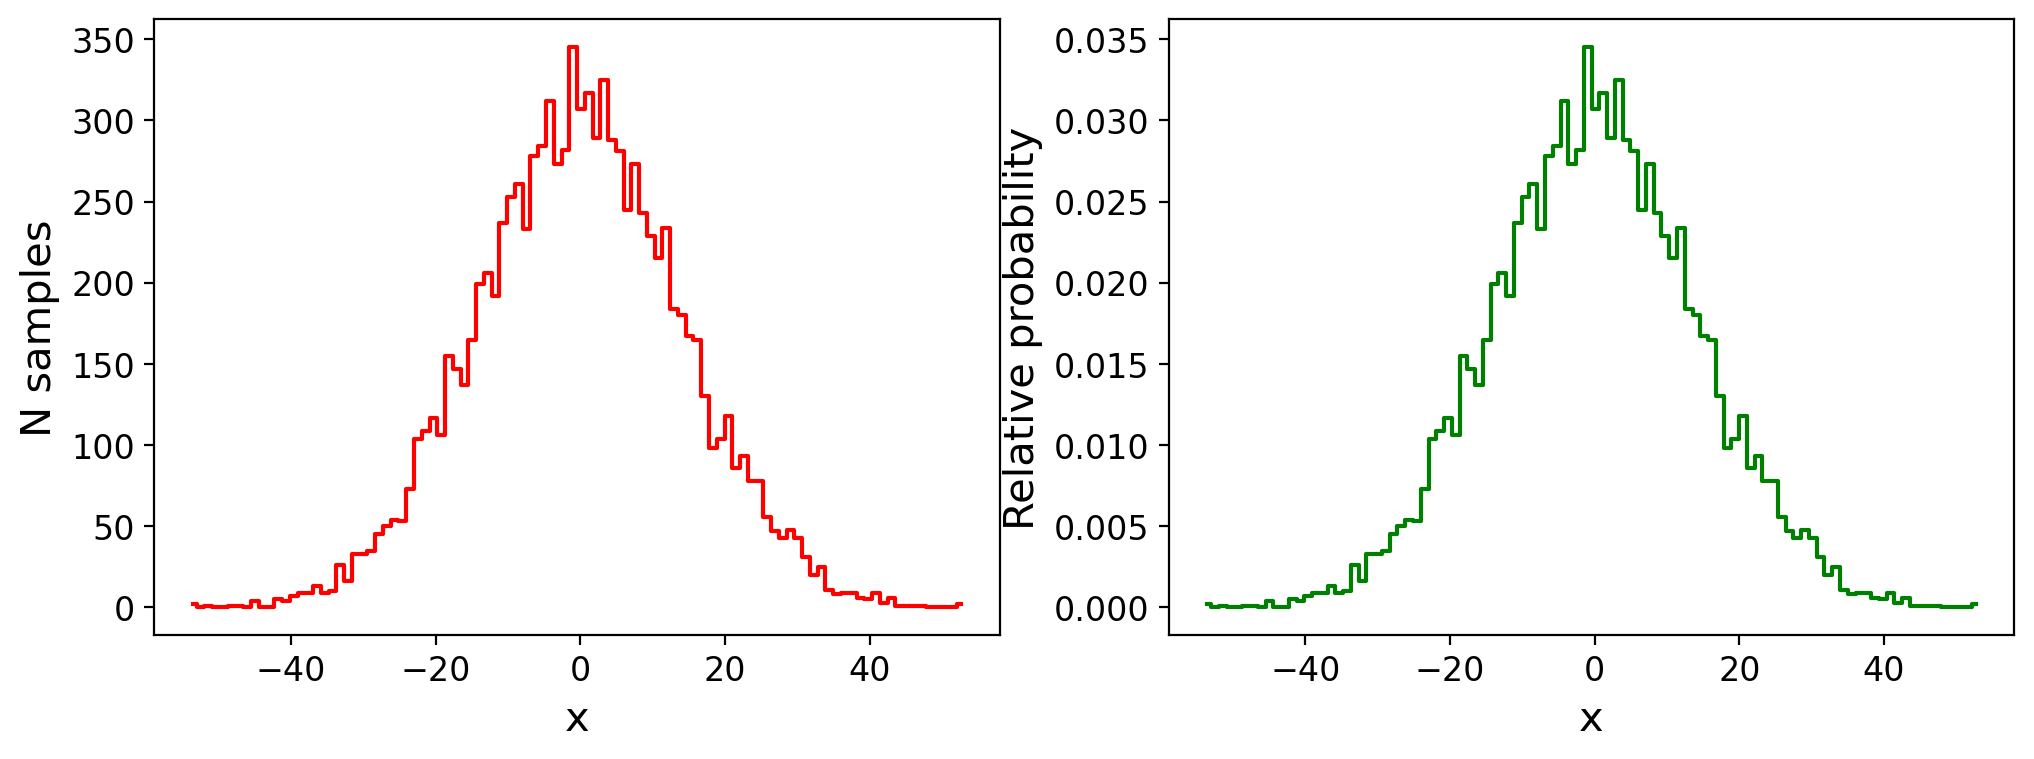

In [43]:
plt.figure(figsize=(12, 4))
plotData(data2)
plt.savefig("lec1pic4.pdf", dpi=400)
plt.show()